
***HW 1 “Where Do We Come From? What Are We? Where Are We Going?”.
Phylogenetics, human evolution.***


In [ ]:
unzip Human.zip

In [ ]:
conda install -c bioconda mafft

Запуск из текущей папки, объединенние всех скачанных файлов (45 штук) с расширением .fasta

In [ ]:
cat *.fasta > all_sequences.fasta  

Используем инструмент MAFFT для выполнения множественного выравнивания последовательностей (multiple sequence alignment) и записываем результат в файл aligned_sequences.fasta.

In [ ]:
mafft --auto all_sequences.fasta > aligned_sequences.fasta 

In [ ]:
conda install -c bioconda fasttree

In [ ]:
fasttree –help

In [ ]:
FastTree -gtr -nt -boot 1000 aligned_sequences.fasta > tree_with_bootstrap_1.newick

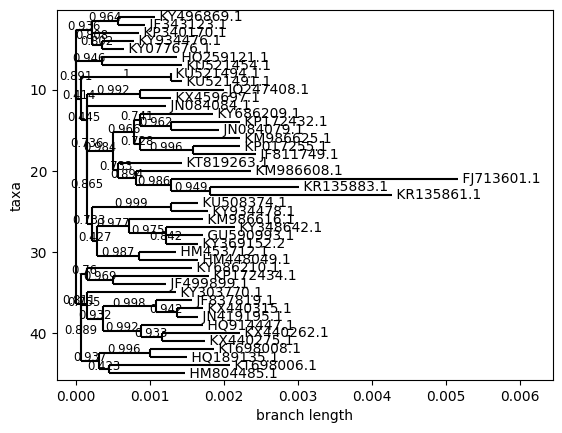

In [4]:
from Bio import Phylo
import matplotlib.pyplot as plt

tree = Phylo.read("tree_with_bootstrap_1.newick", "newick")

Phylo.draw(tree)
plt.show()

Используем программу FastTree для построения филогенетического дерева на основе выровненных последовательностей из файла aligned_sequences.fasta. Файл результата записывается в формате Newick в tree_with_bootstrap_1.newick. Бутстреп-анализ с 1000 репликациями, чтобы оценить надежность узлов дерева.

Визуализируем полученный файл tree_with_bootstrap_1.newick на https://itol.embl.de/tree/77918652174621727118562 

Расчет возраста митохондриальной Евы: Для мтДНК человека скорость мутаций может составлять примерно 1 мутация на 5000 лет.  Возраст = Количество мутаций между исследуемыми последовательностями/2 


In [6]:
from Bio import AlignIO

alignment = AlignIO.read("aligned_sequences.fasta", "fasta")

def get_sequence_by_id(alignment, seq_id):
    for record in alignment:
        if record.id == seq_id:
            return record.seq
    return None

african_id = "FJ713601.1"
non_african_id = "KY934476.1"

african_seq = get_sequence_by_id(alignment, african_id)
non_african_seq = get_sequence_by_id(alignment, non_african_id)

if african_seq is None or non_african_seq is None:
    print("Одна или обе последовательности не найдены.")
    exit()

def count_mutations(seq1, seq2):
    mutations = 0
    for a, b in zip(seq1, seq2):
        if a != b and a != '-' and b != '-':  
            mutations += 1
    return mutations

mutations = count_mutations(african_seq, non_african_seq)

years_per_mutation = 5000
age = (mutations * years_per_mutation) / 2 

print(f"Количество мутаций между {african_id} и {non_african_id}: {mutations}")
print(f"Возраст митохондриальной Евы: {age} лет")



Количество мутаций между FJ713601.1 и KY934476.1: 80
Возраст митохондриальной Евы: 200000.0 лет


Далее добавляем файлы по Неандертальцам и Денисовцам и выполняем действия выше в том же порядке

In [ ]:
unzip Neanderthal.zip  

In [ ]:
unzip Denisova.zip

In [ ]:
cat *.fasta Neanderthal/*.fasta Denisova/*.fasta > combined_sequences.fasta

In [ ]:
mafft --auto combined_sequences.fasta > aligned_new_sequences.fasta

In [ ]:
fasttree -nt -boot 1000 aligned_new_sequences.fasta > tree_with_bootstrap.newick

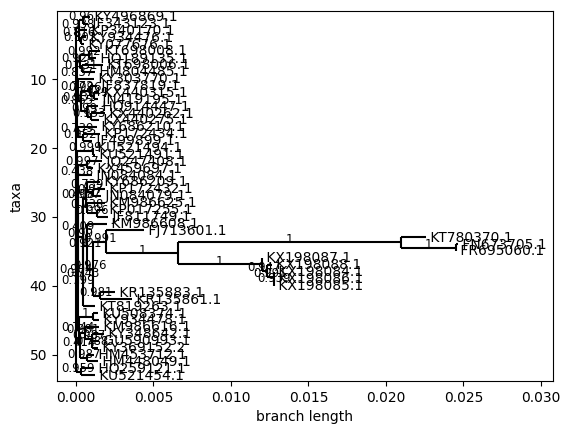

In [2]:
from Bio import Phylo
import matplotlib.pyplot as plt

tree = Phylo.read("tree_with_bootstrap.newick", "newick")

Phylo.draw(tree)
plt.show()

Визуализирован полученный файл tree_with_bootstrap.newick  https://itol.embl.de/tree/77918652251961727119835 

The age of the most recent Neanderthal-modern human ancestor:


In [7]:
from Bio import AlignIO

alignment = AlignIO.read("aligned_new_sequences.fasta", "fasta")

def get_sequence_by_id(alignment, seq_id):
    for record in alignment:
        if record.id == seq_id:
            return record.seq
    return None

human_id = "KY934476.1"
neanderthal_id = "KX198084.1"

human_seq = get_sequence_by_id(alignment, human_id)
neanderthal_seq = get_sequence_by_id(alignment, neanderthal_id)

if human_seq is None or neanderthal_seq is None:
    print("Одна или обе последовательности не найдены.")
    exit()

def count_mutations(seq1, seq2):
    mutations = 0
    for a, b in zip(seq1, seq2):
        if a != b and a != '-' and b != '-': 
            mutations += 1
    return mutations

mutations = count_mutations(human_seq, neanderthal_seq)

years_per_mutation = 5000
age = (mutations * years_per_mutation) / 2  

print(f"Количество мутаций между {human_id} и {neanderthal_id}: {mutations}")
print(f"Возраст общего предка: {age} лет")


Количество мутаций между KY934476.1 и KX198084.1: 212
Возраст общего предка: 530000.0 лет


То есть возраст ближайшего к современным людям предка - неандертальца равен 530 000 лет 

Рассчитаем возраст расхождения Неандертальцев и Денисовцев

In [8]:
from Bio import AlignIO

alignment = AlignIO.read("aligned_new_sequences.fasta", "fasta")
def get_sequence_by_id(alignment, seq_id):
    for record in alignment:
        if record.id == seq_id:
            return record.seq
    return None
neanderthal_id = "KX198084.1"
denisovan_ids = ["FN673705.1", "FR695060.1", "KT780370.1"]

neanderthal_seq = get_sequence_by_id(alignment, neanderthal_id)
if neanderthal_seq is None:
    print(f"Не найдена последовательность неандертальца с ID {neanderthal_id}")
    exit()
def count_mutations(seq1, seq2):
    mutations = 0
    for a, b in zip(seq1, seq2):
        if a != b and a != '-' and b != '-':  
            mutations += 1
    return mutations
total_mutations = 0
mutation_counts = []

for denisovan_id in denisovan_ids:
    denisovan_seq = get_sequence_by_id(alignment, denisovan_id)

    if denisovan_seq is None:
        print(f"Не найдена последовательность денисовца с ID {denisovan_id}")
        continue

    mutations = count_mutations(neanderthal_seq, denisovan_seq)
    mutation_counts.append(mutations)
    total_mutations += mutations

    print(f"Количество мутаций между {neanderthal_id} и {denisovan_id}: {mutations}")

if len(mutation_counts) > 0:
    average_mutations = total_mutations / len(mutation_counts)
else:
    print("Нет данных для вычисления среднего количества мутаций.")
    exit()
years_per_mutation = 5000
age = (average_mutations * years_per_mutation) / 2 

print(f"\nСреднее количество мутаций между неандертальцем и денисовцами: {average_mutations}")
print(f"Возраст общего предка денисовцев и неандертальцев (с учётом деления на 2): {age} лет")

Количество мутаций между KX198084.1 и FN673705.1: 391
Количество мутаций между KX198084.1 и FR695060.1: 391
Количество мутаций между KX198084.1 и KT780370.1: 369

Среднее количество мутаций между неандертальцем и денисовцами: 383.6666666666667
Возраст общего предка денисовцев и неандертальцев (с учётом деления на 2): 959166.6666666667 лет


Около 959166 лет назад произошло расхождение неандертальцев и денисовцев 

In [ ]:
unzip Pan.zip

In [ ]:
cat combined_sequences.fasta NC_001643.1_Pan_troglodytes.fasta D38116.1_Pan_paniscus.fasta > last_sequences.fasta


In [ ]:
mafft --auto last_sequences.fasta > aligned_new_sequences.fasta


In [ ]:
fasttree -nt -boot 1000 aligned_last_sequences.fasta > tree_with_bootstrap_last.newick 

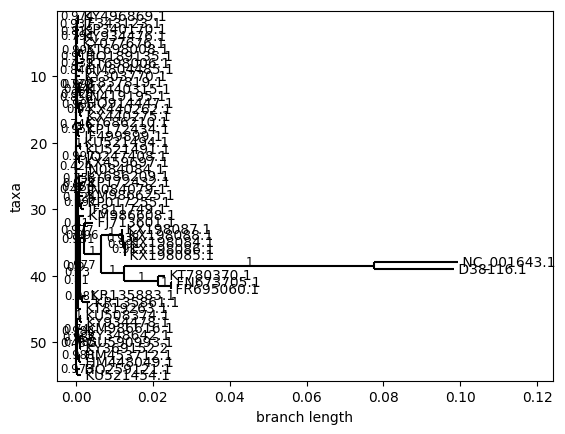

In [5]:
from Bio import Phylo
import matplotlib.pyplot as plt

tree = Phylo.read("tree_with_bootstrap_last.newick", "newick")

Phylo.draw(tree)
plt.show()

Визуализирован полученный файл tree_with_bootstrap.newick https://itol.embl.de/tree/77918652306031727207876

Возраст митохондриальной Евы и расхождение Homo sapiens с неандертальцами подтверждают современные научные данные.
Расхождение между неандертальцами и денисовцами получилось несколько завышенным по сравнению с общепринятыми оценками, что может быть связано с особенностями исходных данных (например, качеством выравнивания или мутационной скоростью, использованной в расчётах).